# Step 1: Stepup

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.12.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 2: Importing Dataset from Kaggle

In [ ]:
# install kaggle API
! pip install kaggle

In [5]:
# create a directory
! mkdir -p ~/.kaggle

In [6]:
# import kaggle API
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
# Copy API key to directory
! cp kaggle.json ~/.kaggle

In [8]:
# Disable API key
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
# list of datasets
! kaggle datasets list

ref                                                               title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
alphiree/cardiovascular-diseases-risk-prediction-dataset          Cardiovascular Diseases Risk Prediction Dataset       5MB  2023-07-03 12:12:19            973         41  1.0              
arnavsmayan/netflix-userbase-dataset                              Netflix Userbase Dataset                             25KB  2023-07-04 07:38:41           1047         29  1.0              
aaditshukla/flipkart-fasion-products-dataset                       Ecommerce Product dataset                           15MB  2023-07-04 05:44:07            572         24  0.9411765        
arthurchongg/imdb-top-1000-movies                 

In [10]:
# import the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

 99% 65.0M/66.0M [00:02<00:00, 32.0MB/s]
100% 66.0M/66.0M [00:02<00:00, 23.2MB/s]


In [11]:
# Unzip the dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [12]:
dataset_1 = pd.read_csv('/content/creditcard.csv')

In [13]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 3: Data Preprocessing

In [14]:
dataset_1.shape

(284807, 31)

In [15]:
dataset_1.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [16]:
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
# Observation in each class
dataset_1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
# Balance the dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [20]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [21]:
# random selection of samples
non_fraud_t= non_fraud.sample(n= 492)

In [22]:
non_fraud_t.shape

(492, 31)

In [23]:
# merge the dataset
dataset = fraud.append(non_fraud_t, ignore_index=True)

<ipython-input-23-5786ba4fed05>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = fraud.append(non_fraud_t, ignore_index=True)


In [24]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [25]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
979,164755.0,-0.747401,0.911818,0.912289,-1.104899,-0.295757,-0.110130,-0.111374,0.651700,0.299753,...,-0.121493,-0.399378,-0.026216,-0.461906,-0.165570,-0.256617,0.006395,0.001402,0.77,0
980,7337.0,1.168216,-0.404557,0.819377,0.111281,-0.490678,0.652571,-0.808907,0.138589,2.393545,...,-0.278886,-0.402366,-0.062300,-0.896604,0.145260,1.038019,-0.051613,0.004245,50.00,0
981,66762.0,1.141163,-0.014348,0.633262,1.334864,-0.469788,-0.031061,-0.240470,0.127396,0.760940,...,-0.061923,0.049332,-0.065615,0.075632,0.599189,-0.282000,0.050299,0.018264,11.50,0
982,69773.0,-4.947025,-0.780681,-1.788315,-2.495171,-2.884292,0.508958,-1.752350,2.708708,-0.266869,...,0.084529,-0.036105,-0.643719,-0.546515,-0.708880,-0.195505,-0.823888,-0.488016,129.53,0
983,166671.0,2.115643,-0.127972,-1.396113,0.247359,0.149969,-0.803235,0.112399,-0.240176,0.717178,...,-0.348437,-0.904410,0.257532,-0.738254,-0.225556,0.245369,-0.076979,-0.069411,1.29,0


In [26]:
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [27]:
# matrix of features
x = dataset.drop(labels=['Class'],axis=1)

In [28]:
# dependent varaible
y = dataset['Class']

In [29]:
x.shape, y.shape

((984, 30), (984,))

In [33]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state=0)

In [34]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [35]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
x_train

array([[ 1.24890693,  0.23551298, -0.77270108, ..., -0.11107383,
        -0.19533844, -0.36587834],
       [-0.83024899,  0.50632823, -0.08237797, ...,  0.46662449,
         0.24933409, -0.48644773],
       [-0.8668035 ,  0.19790731,  0.10075266, ...,  0.31384828,
         0.17657503, -0.48534496],
       ...,
       [ 1.72510457,  0.65410922, -0.98454321, ..., -0.14175229,
        -0.11321408,  1.11826465],
       [-1.0708617 ,  0.25069917, -0.35776544, ..., -0.28957352,
        -0.20025545, -0.07079579],
       [-0.60618266,  0.28911085, -0.35867928, ..., -0.02923047,
         0.05349301, -0.35213968]])

In [37]:
y_test, y_train

(231    1
 522    0
 27     1
 630    0
 930    0
       ..
 113    1
 970    0
 37     1
 647    0
 881    0
 Name: Class, Length: 197, dtype: int64,
 894    0
 158    1
 154    1
 40     1
 793    0
       ..
 835    0
 192    1
 629    0
 559    0
 684    0
 Name: Class, Length: 787, dtype: int64)

In [38]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [39]:
y_test, y_train

(array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0]),
 array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0

In [40]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [41]:
# reshape the dataset
x_train = x_train.reshape(787,30,1)
x_test = x_test.reshape(197, 30, 1)

In [42]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Step 4: Building the Model

In [50]:
# Define an object
model = tf.keras.models.Sequential()

In [51]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size= 2, padding='same', activation='relu', input_shape= (30,1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(.2))

In [52]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size= 2, padding='same', activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(.3))

In [53]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [54]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64 , activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(.3))

In [55]:
# Output layer
model.add(tf.keras.layers.Dense(units=1 , activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 30, 32)           128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 15, 64)          

In [58]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [60]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Training the Model


In [61]:
history = model.fit(x_train, y_train, epochs= 25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 [==============================] - 4s 22ms/step - loss: 1.0990 - accuracy: 0.5044 - val_loss: 0.6642 - val_accuracy: 0.7107
Epoch 2/25
25/25 [==============================] - 0s 8ms/step - loss: 0.7883 - accuracy: 0.6163 - val_loss: 0.6254 - val_accuracy: 0.7462
Epoch 3/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6447 - accuracy: 0.7065 - val_loss: 0.5889 - val_accuracy: 0.7513
Epoch 4/25
25/25 [==============================] - 0s 8ms/step - loss: 0.5419 - accuracy: 0.7802 - val_loss: 0.5600 - val_accuracy: 0.7310
Epoch 5/25
25/25 [==============================] - 0s 8ms/step - loss: 0.4947 - accuracy: 0.7992 - val_loss: 0.5331 - val_accuracy: 0.7310
Epoch 6/25
25/25 [==============================] - 0s 8ms/step - loss: 0.4337 - accuracy: 0.8183 - val_loss: 0.5044 - val_accuracy: 0.7614
Epoch 7/25
25/25 [==============================] - 0s 8ms/step - loss: 0.4067 - accuracy: 0.8208 - val_loss: 0.4755 - val_accuracy: 0.7766
Epoch 8/25
25/25 [=

In [62]:
# model prediction
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

7/7 [==============================] - 0s 3ms/step


In [63]:
y_pred[5], y_test[5]

(array([1]), 1)

In [64]:
y_pred[52], y_test[52]

(array([0]), 0)

In [65]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[105,   1],
       [ 11,  80]])

In [66]:
acc = accuracy_score(y_test, y_pred)

In [67]:
acc

0.9390862944162437

# Step 6: Learning Curve

In [69]:
def learning_curve (history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # training vs validation loss
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

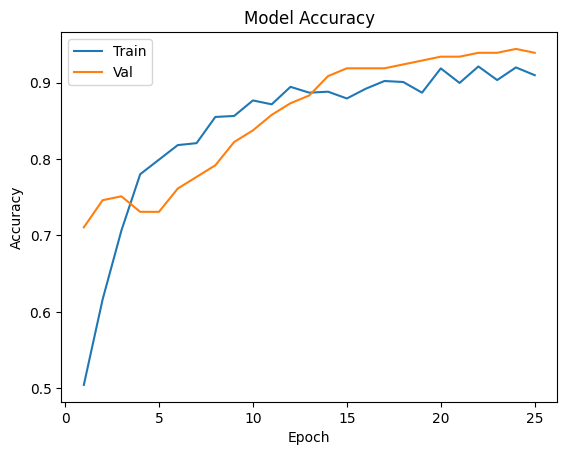

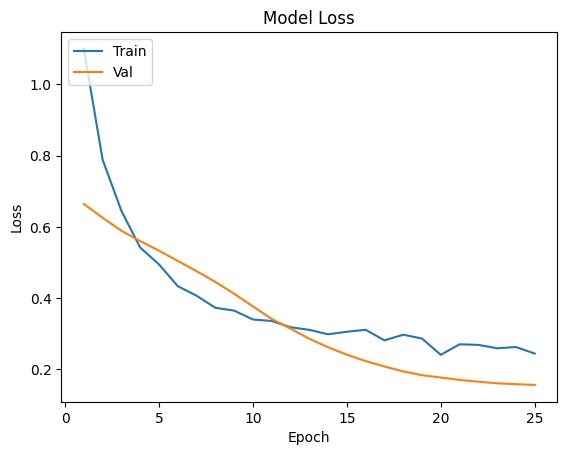

In [70]:
learning_curve(history, 25)